In [12]:
#librairy
#import the droplet file and load them in a dataframe
import pandas as pd
import numpy as np
import os
from os import listdir
from os.path import isfile, join, isdir
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.interpolate as si
from pandas import DataFrame as pddf

In [3]:
def loadData(path):
    drpfiles=[path+'droplets/' + f for f in listdir(path + 'droplets/') if isfile(join(path + 'droplets/',f))]

    i=0
    df={}
    for file in drpfiles:
        df[i]=pd.read_csv(file)
        i+=1 

        #create the template file in hiccup mode
    tpfile=pd.read_csv(path+'template.csv', header=4)
    tpFileOrd=tpfile.set_index('order')
    label=list(set(tpfile['description']))
    label2=[l for l in label if l!='Empty' and l!='CAA']
    dropMap=[]


    for i in range(0,len(tpFileOrd)-1,2):
        for j in range(2*(tpFileOrd.droplet_number[i])):
            if j%2==0 :
                dropMap.append([tpFileOrd.well[i], tpFileOrd.description[i]])
            else : 
                dropMap.append([tpFileOrd.well[i+1], tpFileOrd.description[i+1]])

    dropMap=np.array(dropMap)
    
    return [dropMap, df, label2]


In [39]:
data = pddf()
listPdf = np.array([23.,323.2, 2323.,23.2, 0])
data['AHA']=listPdf
listPdf=np.append(listPdf, [56.,33.2, 63.,87.2, 83])
print(listPdf)
#print(data['AHA'])
data=pd.DataFrame([listPdf, [0]],columns=['AHA', 'OH'])
print(np.array(data['AHA']))

[   23.    323.2  2323.     23.2     0.     56.     33.2    63.     87.2
    83. ]


AssertionError: 2 columns passed, passed data had 10 columns

In [9]:
#path='/Users/maxime/Documents/experiences/milli/MILLIDROP_manip/2018-02-08_calibration_CAA_WTGFP/analysis/'
path='/Users/maxime/Documents/experiences/milli/MILLIDROP_manip/2018-05-29_calibration_WT_mC_GFP/analysis/'
[dropMap, df, label]=loadData(path)

print(label)

choice=['blue','green','red','cyan','magenta','yellow','black','blue','green','red','cyan','magenta','yellow','black']
colors=choice[0:len(label)];
channel='GFP'
#label=['CAA1mM', 'CAA100uM','CAA0M']
#label =['CAA1mM', 'CAA100uM', 'CAA0M','CAA400uM', 'CAA700uM', 'CAA0M-eth', 'CAA0M']
#label = ['CAA-1', 'CAA-5', 'CAA-10', 'CAA-25', 'CAA-50']

pos=-1
data=pddf()
for i,content in enumerate(dropMap[:,1]):
        for j,tmp in enumerate(label):
            if content==tmp:
                p=df[i]
                if channel=='mCherry':
                    p=df[j]
                    listPdf = np.array(data[tmp])
                    listPdf = np.append(listPdf, np.array(np.log(p.fluo_2_area*p.speed/p.size),dtype=np.float64))
                    data[tmp] = listPdf

                if channel=='GFP':
                    p=df[j]
                    y=np.array(np.log(p.fluo_3_area*p.speed),dtype=np.float64)
                    x=np.array(p.time/3600,dtype=np.float64)
                    ystd=np.array(np.divide(p.fluo_3_std+incCarte/2,p.fluo_3_median))
                    #plt.scatter(i, y.iloc[pos],c=colors[j], cmap=plt.cm.RdYlGn)
                if channel=='PVD':
                    p=df[j]
                    y=np.array(np.log(p.fluo_1_area*p.speed))
                    x=np.array(p.time/3600,dtype=np.float64)
                    ystd=np.array(np.divide(p.fluo_1_std+incCarte/2,p.fluo_1_median),dtype=np.float64)
                    #plt.scatter(i, y.iloc[pos],c=colors[j], cmap=plt.cm.RdYlGn)
                    



['0-GFP', '6-GFP', '5-GFP', '0-mC', '3-mC', '6-mC', '2-mC', '1-mC', '3-GFP', '1-GFP', '7-mC', '4-GFP', '4-mC', '2-GFP', '5-mC']


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:29: RuntimeWarning: divide by zero encountered in true_divide


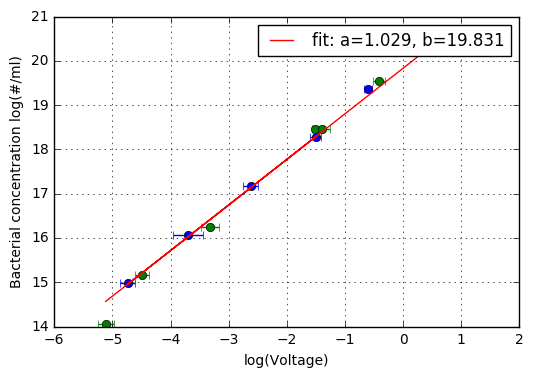

In [43]:
#2018-02-08
Nw=np.mean([6e7, 95e6])*10 #comptage boite bact/ml
Npvd=np.mean([4e7, 22e6])*10
#voltage
washed0=[1.896,1.846,1.869,1.911]
washed1=[0.588,0.579,0.548,0.525,0.495]
washed2=[0.25,0.217,0.200]
washed3=[0.078,0.083,0.063,0.061,0.078]
washed4=[0.021,0.034,0.031,0.017,0.021]
washed5=[0.01,0.009,0.007,0.009]

pvd0=[0.605,0.596,0.627,0.750,0.724]
pvd1=[0.198,0.222,0.229,0.232,0.218]
pvd2=[0.310,0.259,0.235,0.241,0.205]
pvd3=[0.034,0.044,0.041,0.028,0.035]
pvd4=[0.01,0.012,0.013,0.0099]
pvd5=[0.005,0.006,0.007]

pvd=list()
pvd.append(np.mean(pvd0))
pvd.append(np.mean(pvd1))
pvd.append(np.mean(pvd2))
pvd.append(np.mean(pvd3))
pvd.append(np.mean(pvd4))
pvd.append(np.mean(pvd5))

pvdstd=list()
pvdstd.append(np.std(pvd0))
pvdstd.append(np.std(pvd1))
pvdstd.append(np.std(pvd2))
pvdstd.append(np.std(pvd3))
pvdstd.append(np.std(pvd4))
pvdstd.append(np.std(pvd5))


w=list()
w.append(np.mean(washed0))
w.append(np.mean(washed1))
w.append(np.mean(washed2))
w.append(np.mean(washed3))
w.append(np.mean(washed4))
w.append(np.mean(washed5))

wstd=list()
wstd.append(np.std(washed0))
wstd.append(np.std(washed1))
wstd.append(np.std(washed2))
wstd.append(np.std(washed3))
wstd.append(np.std(washed4))
wstd.append(np.std(washed5))

#dilutions
dw=np.array([(1/3)**0,(1/3)**1,(1/3)**2,(1/3)**3,(1/3)**4,(1/3)**5])
dpvd=np.array([(1/3)**0,(1/3)**1,(1/3)**1,(1/3)**3,(1/3)**4,(1/3)**5])

plt.errorbar(np.log(w),np.log(dw*Nw),xerr=np.array(wstd)/np.array(w),fmt='o')
plt.errorbar(np.log(pvd),np.log(dpvd*Npvd),xerr=np.array(pvdstd)/np.array(pvd),fmt='o',c='g')

#plt.ylim([6,10])
plt.xlim([-6,2])
x=np.arange(-5,1)
#plt.plot(x,x*2.5+20)
plt.xlabel('log(Voltage)')
plt.ylabel('Bacterial concentration log(#/ml)')
plt.grid('on')

#print("{:.2E}".format(d[0]*Nw*1e-3))
#print("{:.2E}".format(d[-1]*Nw*1e-3))



def func(x, a, b):
    return a*x+b

xdata=np.concatenate((np.log(w),np.log(pvd[1:])))
ydata=np.concatenate((np.log(dw*Nw),np.log(dpvd[1:]*Npvd)))
s=np.concatenate((np.array(wstd)/np.array(w),np.array(pvdstd[1:])/np.array(pvd[1:])))

popt, pcov = curve_fit(func, xdata, ydata,sigma=s)
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.legend()


fig1 = plt.gcf()
fig1.savefig('/Users/maxime/Documents/experiences/milli/MILLIDROP_manip/2018-02-08_calibration_CAA_WTGFP/calibration_log.png')
plt.show()


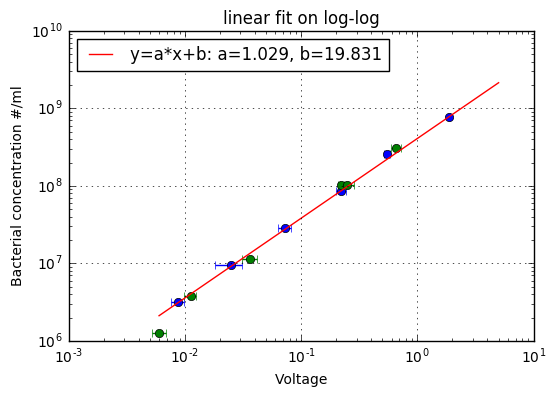

In [48]:
plt.errorbar(w,dw*Nw,xerr=wstd,fmt='o')
plt.errorbar(pvd,dpvd*Npvd,xerr=pvdstd,fmt='o',c='g')
plt.plot([6e-3,5],np.exp(func(np.log([6e-3,5]),*popt)),c='r',label='y=a*x+b: a=%5.3f, b=%5.3f' % tuple(popt))
plt.xlabel('Voltage')
plt.ylabel('Bacterial concentration #/ml')
plt.grid('on')
plt.legend(loc='upper left')
plt.yscale('log')
plt.xscale('log')
plt.title('linear fit on log-log')
fig1 = plt.gcf()
fig1.savefig('/Users/maxime/Documents/experiences/milli/MILLIDROP_manip/2018-02-08_calibration_CAA_WTGFP/calibration.png')
plt.show()

In [10]:
for i,content in enumerate(dropMap[:,1]):
        for j,tmp in enumerate(label):
            if content==tmp:
                p=df[i]
                if channel=='mCherry':
                    try:
                        channelNo=2
                        axarr[j].scatter(p.time/3600, np.log(p.fluo_2_median),c=colors[j], cmap=plt.cm.RdYlGn)
                        axarr[j].plot(np.ones(2)*seuiTemps,[-10, 5],c='k')
                        axarr[j].set_ylim([low, high])
                    except Exception as inst:
                            donothing=0
                            #print(type(inst))
                        
                if channel=='GFP':
                    try:
                        channelNo=3
                        axarr[j].scatter(p.time/3600, np.log(p.fluo_3_median),c=colors[j], cmap=plt.cm.RdYlGn)
                        axarr[j].plot(np.ones(2)*seuiTemps,[-10, 5],c='k')
                        axarr[j].set_ylim([low, high])
                    except Exception as inst:
                            donothing=0
                            #print(type(inst))
                    #plt.plot(p.time/3600, np.log(p.fluo_3_median),c=colors[j])
                if channel=='PVD':
                    try:
                        channelNo=1
                        axarr[j].scatter(p.time/3600, np.log(p.fluo_1_median),c=colors[j], cmap=plt.cm.RdYlGn)
                        axarr[j].plot(np.ones(2)*seuiTemps,[-10, 5],c='k')
                        axarr[j].set_ylim([low, high])
                    except Exception as inst:
                            donothing=0
                            #print(type(inst))



{0:    run  end_time  end_time_ptd1  end_time_ptd2  fluo_1_area  fluo_1_cov  \
0    0       NaN            NaN            NaN          NaN         NaN   
1    1       NaN       4228.552       4234.944        1.938    0.242924   
2    2       NaN       4271.672       4265.984        2.763    0.212099   
3    3       NaN       4773.296       4779.680        3.674    0.234030   
4    4       NaN       4816.432       4810.760        2.798    0.248950   
5    5       NaN       5317.248       5323.616        3.914    0.229051   
6    6  5359.912       5359.912       5354.240        3.630    0.337163   

   fluo_1_max  fluo_1_mean  fluo_1_median  fluo_1_shift      ...        \
0         NaN          NaN            NaN           NaN      ...         
1       0.075     0.046143          0.041           0.0      ...         
2       0.068     0.044308          0.041         -36.0      ...         
3       0.073     0.046425          0.042           4.0      ...         
4       0.068     0.04061

In [ ]:
#2018-05-29
#GFP
Nw=np.mean([9e8, 9e8, 1.4e8]) #comptage FACS bact/ml
#voltage area
washed0=[1.896,1.846,1.869,1.911]
washed1=[0.588,0.579,0.548,0.525,0.495]
washed2=[0.25,0.217,0.200]
washed3=[0.078,0.083,0.063,0.061,0.078]
washed4=[0.021,0.034,0.031,0.017,0.021]
washed5=[0.01,0.009,0.007,0.009]

pvd0=[0.605,0.596,0.627,0.750,0.724]
pvd1=[0.198,0.222,0.229,0.232,0.218]
pvd2=[0.310,0.259,0.235,0.241,0.205]
pvd3=[0.034,0.044,0.041,0.028,0.035]
pvd4=[0.01,0.012,0.013,0.0099]
pvd5=[0.005,0.006,0.007]

pvd=list()
pvd.append(np.mean(pvd0))
pvd.append(np.mean(pvd1))
pvd.append(np.mean(pvd2))
pvd.append(np.mean(pvd3))
pvd.append(np.mean(pvd4))
pvd.append(np.mean(pvd5))

pvdstd=list()
pvdstd.append(np.std(pvd0))
pvdstd.append(np.std(pvd1))
pvdstd.append(np.std(pvd2))
pvdstd.append(np.std(pvd3))
pvdstd.append(np.std(pvd4))
pvdstd.append(np.std(pvd5))


w=list()
w.append(np.mean(washed0))
w.append(np.mean(washed1))
w.append(np.mean(washed2))
w.append(np.mean(washed3))
w.append(np.mean(washed4))
w.append(np.mean(washed5))

wstd=list()
wstd.append(np.std(washed0))
wstd.append(np.std(washed1))
wstd.append(np.std(washed2))
wstd.append(np.std(washed3))
wstd.append(np.std(washed4))
wstd.append(np.std(washed5))

#dilutions
dw=np.array([(1/3)**0,(1/3)**1,(1/3)**2,(1/3)**3,(1/3)**4,(1/3)**5])
dpvd=np.array([(1/3)**0,(1/3)**1,(1/3)**1,(1/3)**3,(1/3)**4,(1/3)**5])

plt.errorbar(np.log(w),np.log(dw*Nw),xerr=np.array(wstd)/np.array(w),fmt='o')
plt.errorbar(np.log(pvd),np.log(dpvd*Npvd),xerr=np.array(pvdstd)/np.array(pvd),fmt='o',c='g')

#plt.ylim([6,10])
plt.xlim([-6,2])
x=np.arange(-5,1)
#plt.plot(x,x*2.5+20)
plt.xlabel('log(Voltage)')
plt.ylabel('Bacterial concentration log(#/ml)')
plt.grid('on')

#print("{:.2E}".format(d[0]*Nw*1e-3))
#print("{:.2E}".format(d[-1]*Nw*1e-3))



def func(x, a, b):
    return a*x+b

xdata=np.concatenate((np.log(w),np.log(pvd[1:])))
ydata=np.concatenate((np.log(dw*Nw),np.log(dpvd[1:]*Npvd)))
s=np.concatenate((np.array(wstd)/np.array(w),np.array(pvdstd[1:])/np.array(pvd[1:])))

popt, pcov = curve_fit(func, xdata, ydata,sigma=s)
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.legend()


fig1 = plt.gcf()
fig1.savefig('/Users/maxime/Documents/experiences/milli/MILLIDROP_manip/2018-02-08_calibration_CAA_WTGFP/calibration_log.png')
plt.show()